# openCV Image Processing

In this notebook you will try some basics of image processing using openCV.

## Prerequisites

Install opencv: 

`pip install opencv-python 
pip install opencv-contrib-python `

Install matplotlib and numpy:

`pip install matplotlib 
pip install numpy `

If you are using Anaconda (root interpreter), you can install opencv from anaconda sources:

`conda install -c conda-forge opencv`

Or you can navigate to `/path/to/Anaconda/Scripts` and run pip commands from here.


## Let's begin!

To start, we need to read the image using [imread](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html) function.

<class 'numpy.ndarray'>
uint8


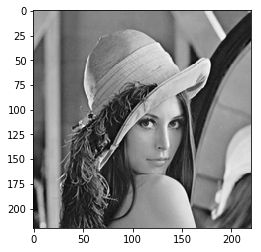

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

image_path = 'openCV-data/lena.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.dtype)

plt.imshow(img, cmap='gray')

Note that the image is read as *numpy.ndarray*. That means that you can add constants to the image, multiply them, etc - do any mathematical operation that is valid for numpy.ndarray.

Also the *cv2.IMREAD_GRAYSCALE* parameter tells cv2 to read image in grayscale mode (1 channel, only brightness preserved). We will stick with 1 channel for the ease of coding and understanding.

By default, image type is *uint8*, which is inconvinient for manipulation as we are bounded to [0, 255] values of the pixels. That can lead to [overflowed](http://projects.webappsec.org/w/page/13246946/Integer%20Overflows) pixels.

To overcome that, before any manipulation, we should convert image to *float64(or 32, or 16)* type, perform manipulation, normalize image to [0, 255] values, convert image back to uint8 and then show it. 

Text(0.5,1,'Normalized')

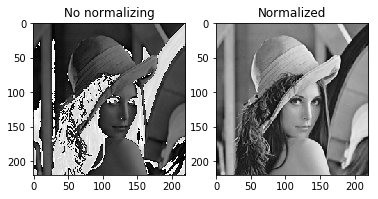

In [2]:
normalizedImg = img.copy()

img += 100000

normalizedImg = normalizedImg.astype(np.float64)
normalizedImg += 100000
cv2.normalize(normalizedImg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
normalizedImg = normalizedImg.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.set_title('No normalizing')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(normalizedImg, cmap='gray')
ax2.set_title('Normalized')

## Tasks

I intentionally give no detailed explenation on tasks. All the theory and formulas will be covered in lectures, all the needed functions of cv2 package are provided in the hyperlinks. The rest can be googled).

Now you are ready to perform some tasks (I hope ))). Issues marked with \* are more complicated than others.
1. Generate noise ([random](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html), salt n pepper) + visualize it
2. Add differnet types of noise to your image and blur it - use different [blur](https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) functions for that
3. Get high frequencies image from the image using using gaussian blur
4. Implement gamma correction technique and apply it to the image
5. Apply gradient filter [-1,1] and compare its work with [advanced filters](https://docs.opencv.org/3.2.0/d5/d0f/tutorial_py_gradients.html) for edges detection 
5. \* Implement Grayworld balancing technique and apply it to the image. Here the image should be read with 3 channels.
6. \* Implement [pipeline](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html) for matching objects in different images. For this issue you should find some image with object(e.g. bear/iphone/Putin), add it to another image and then match initial object image in new image (with object added).

## TASK 1:

In [3]:
def noise(noise_typ, image):
    if noise_typ == "random":
        row, col = img.shape
        noise = np.random.randint(1, 255, size=(row, col))
        noise_img = img + noise
        return noise_img
    elif noise_typ == "s&p":
        row, col = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
        out[coords] = 0
        return out

/Users/juan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/Users/juan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Text(0.5,1,'S&P Noise')

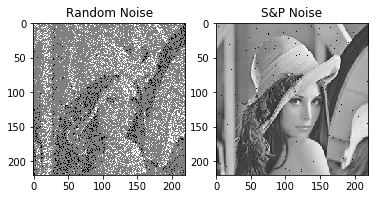

In [4]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#Normalization
normalizedImg = img.copy()
normalizedImg = normalizedImg.astype(np.float64)

#Apply noises
rnd = noise('random', normalizedImg)
s_p = noise('s&p', normalizedImg)

rnd = cv2.normalize(rnd, 0, 255, cv2.NORM_MINMAX)
rnd = rnd.astype(np.uint8)
s_p = cv2.normalize(s_p, s_p, 0, 255, cv2.NORM_MINMAX)
s_p = s_p.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(rnd, cmap='gray')
ax1.set_title('Random Noise')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(s_p, cmap='gray')
ax2.set_title('S&P Noise')

## TASK 2&3:

Text(0.5,1,'Median Blur')

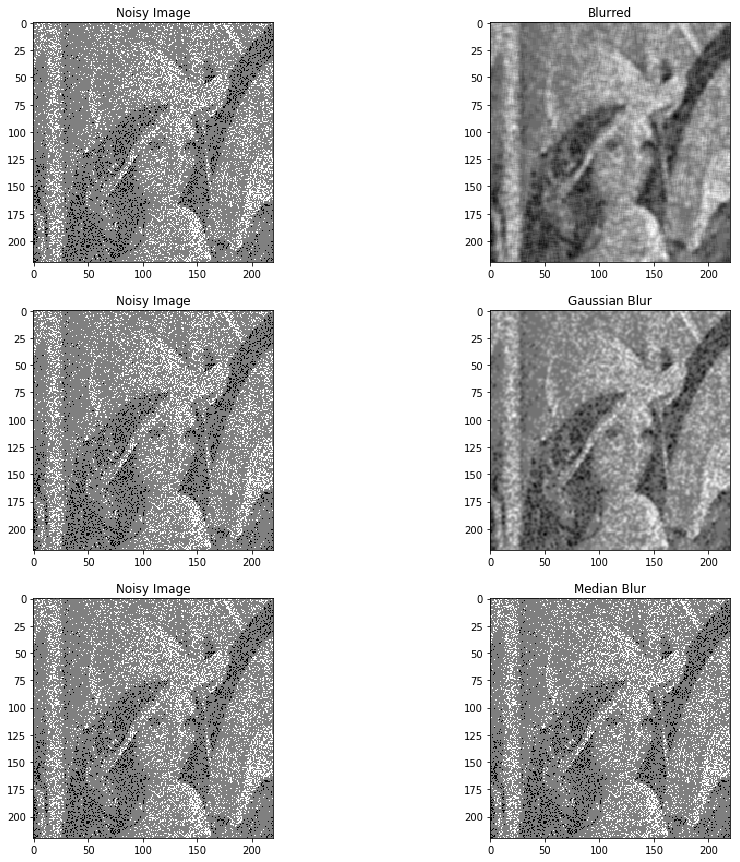

In [5]:
normalizedNoise = rnd.copy()
normalizedNoise = normalizedNoise.astype(np.float64)

#Avereging blur
blur = cv2.blur(normalizedNoise, (5, 5))
blur = cv2.normalize(blur, blur, 0, 255, cv2.NORM_MINMAX)
blur = blur.astype(np.uint8)

#Gaussian Blur
gaussian_blur = cv2.GaussianBlur(normalizedNoise,(5,5),0)
gaussian_blur = cv2.normalize(gaussian_blur, gaussian_blur, 0, 255, cv2.NORM_MINMAX)
gaussian_blur = gaussian_blur.astype(np.uint8)

#Median blur
median = cv2.medianBlur(normalizedNoise, 1) 
median = cv2.normalize(median, median, 0, 255, cv2.NORM_MINMAX)
median = median.astype(np.uint8)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3,2,1)
ax1.imshow(rnd, cmap='gray')
ax1.set_title('Noisy Image')
ax1 = fig.add_subplot(3,2,2)
ax1.imshow(blur, cmap='gray')
ax1.set_title('Blurred')
ax2 = fig.add_subplot(3,2,3)
ax2.imshow(rnd, cmap='gray')
ax2.set_title('Noisy Image')
ax2 = fig.add_subplot(3,2,4)
ax2.imshow(gaussian_blur, cmap='gray')
ax2.set_title('Gaussian Blur')
ax3 = fig.add_subplot(3,2,5)
ax3.imshow(rnd, cmap='gray')
ax3.set_title('Noisy Image')
ax3 = fig.add_subplot(3,2,6)
ax3.imshow(median, cmap='gray')
ax3.set_title('Median Blur')



## Task 4:

In [55]:
def adjust_gamma(img, correction):
    # function that applies gamma correction and normalizes (2nd part of norm.) the image 
    img = img/255.0
    img = cv2.pow(img, correction)
    cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    nImg = img.astype(np.uint8)
    return nImg

x = cv2.imread('openCV-data/lena.png', cv2.IMREAD_GRAYSCALE)

# First part of normalization
normImg = x.copy()
normImg = normImg.astype(np.float64)

# Application of gamma correction
gamma1 = 0.5
gamma2 = 1.5
adjusted1 = adjust_gamma(normImg, gamma1)
adjusted2 = adjust_gamma(normImg, gamma2)

Text(0.5,1,'Gamma 1.5')

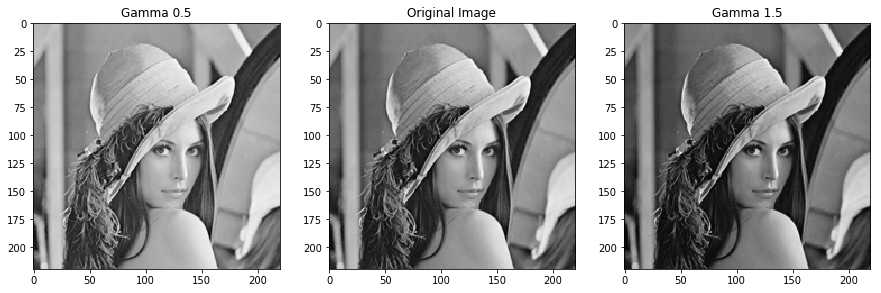

In [56]:
# Plotting Results
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(adjusted1, cmap='gray')
ax1.set_title('Gamma 0.5')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(x, cmap='gray')
ax1.set_title('Original Image')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(adjusted2, cmap='gray')
ax1.set_title('Gamma 1.5')

## Task 5:

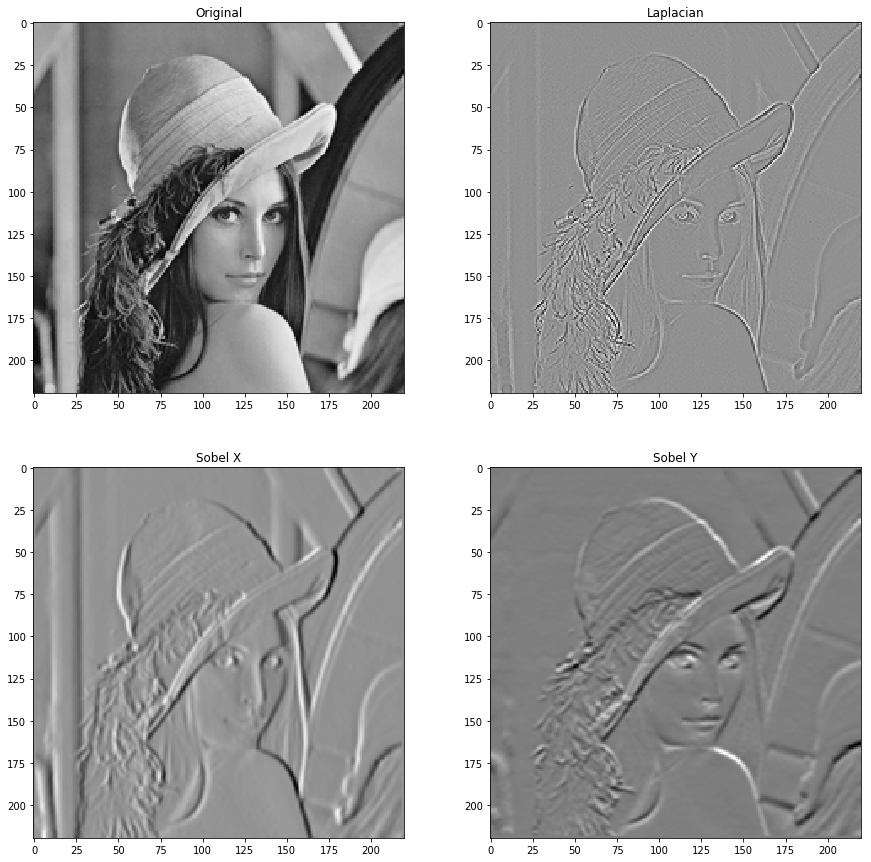

In [67]:
img = cv2.imread('openCV-data/lena.png', cv2.IMREAD_GRAYSCALE)

# First part of normalization
normImg = img.copy()
normImg = normImg.astype(np.float64)

# Gradient filters
laplacian = cv2.Laplacian(normImg, cv2.CV_64F)
sobelx = cv2.Sobel(normImg, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(normImg, cv2.CV_64F, 0, 1, ksize=5)

# 2nd part of normalization
cv2.normalize(laplacian, laplacian, 0, 255, cv2.NORM_MINMAX)
lap_norm = laplacian.astype(np.uint8)
cv2.normalize(sobelx, sobelx, 0, 255, cv2.NORM_MINMAX)
sx_norm = sobelx.astype(np.uint8)
cv2.normalize(sobely, sobely, 0, 255, cv2.NORM_MINMAX)
sy_norm = sobely.astype(np.uint8)

fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(2,2,2) 
plt.imshow(lap_norm, cmap = 'gray')
plt.title('Laplacian')
plt.subplot(2,2,3)
plt.imshow(sx_norm, cmap = 'gray')
plt.title('Sobel X')
plt.subplot(2,2,4)
plt.imshow(sy_norm, cmap = 'gray')
plt.title('Sobel Y')
plt.show()

## Task 6:

Text(0.5,1,'GreyWorld')

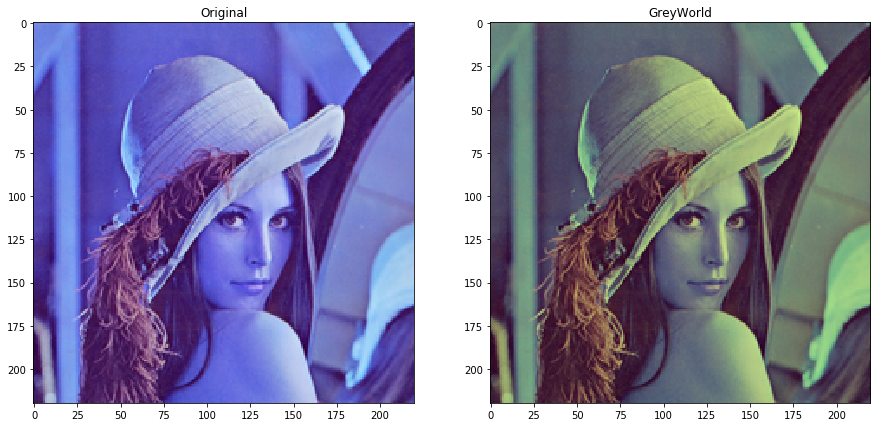

In [72]:
img = cv2.imread('openCV-data/lena.png')

# First part of normalization
normImg = img.copy()
normImg = normImg.astype(np.float64)

def grey_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0]*(mu_g/np.average(nimg[0])),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/np.average(nimg[2])),255)
    return  nimg.transpose(1, 2, 0).astype(np.uint8)


fig = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(grey_world(normImg))
plt.title('GreyWorld')